In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud
import numpy as np
from IPython.display import display, Markdown, Latex

In [4]:
# Define the game name variable
GAME_NAME = "ARK: Survival Evolved"  # Change this to the name of the game you're analyzing

In [5]:
# Ensure plots are displayed inline
%matplotlib inline

In [6]:
# Set default figure size for better PDF output
plt.rcParams['figure.figsize'] = [10, 6]

In [7]:
# Load the data
df = pd.read_csv('../Review CSVs/reviews_346110.csv')

In [8]:
# Convert timestamp_created to datetime
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'])

In [9]:
# Display basic information about the loaded data
print(f"Data loaded successfully for {GAME_NAME}")
print(f"Number of reviews: {len(df)}")
print(f"Date range: from {df['timestamp_created'].min()} to {df['timestamp_created'].max()}")

Data loaded successfully for ARK: Survival Evolved
Number of reviews: 308017
Date range: from 2015-06-02 22:29:25 to 2024-07-23 22:03:59


In [10]:
# Filter data from January 2019 to June 2024
start_date = '2019-01-01'
end_date = '2024-06-30'
df_filtered = df[(df['timestamp_created'] >= start_date) & (df['timestamp_created'] <= end_date)]

print(f"\nNumber of reviews after filtering (Jan 2019 - Jun 2024): {len(df_filtered)}")


Number of reviews after filtering (Jan 2019 - Jun 2024): 210699


In [11]:
# Create a table of contents
display(Markdown(f"# Steam Review Analysis: {GAME_NAME}"))
display(Markdown("## Table of Contents"))
display(Markdown("""
1. [Monthly Review Trends](#monthly-review-trends)
2. [Sentiment Analysis Over Time](#sentiment-analysis-over-time)
3. [Playtime vs Review Sentiment](#playtime-vs-review-sentiment)
4. [Review Length Analysis](#review-length-analysis)
5. [Early Access Impact](#early-access-impact)
6. [Language Distribution](#language-distribution)
7. [Player Experience Level](#player-experience-level)
8. [Review Helpfulness Over Time](#review-helpfulness-over-time)
9. [Seasonal Trends](#seasonal-trends)
10. [Word Frequency Analysis](#word-frequency-analysis)
"""))

# Steam Review Analysis: ARK: Survival Evolved

## Table of Contents


1. [Monthly Review Trends](#monthly-review-trends)
2. [Sentiment Analysis Over Time](#sentiment-analysis-over-time)
3. [Playtime vs Review Sentiment](#playtime-vs-review-sentiment)
4. [Review Length Analysis](#review-length-analysis)
5. [Early Access Impact](#early-access-impact)
6. [Language Distribution](#language-distribution)
7. [Player Experience Level](#player-experience-level)
8. [Review Helpfulness Over Time](#review-helpfulness-over-time)
9. [Seasonal Trends](#seasonal-trends)
10. [Word Frequency Analysis](#word-frequency-analysis)


In [12]:
# Function to create section headers with anchors for the table of contents
def section_header(title, anchor):
    display(Markdown(f"<a id='{anchor}'></a>"))
    display(Markdown(f"## {title}"))

<a id='monthly-review-trends'></a>

## Monthly Review Trends

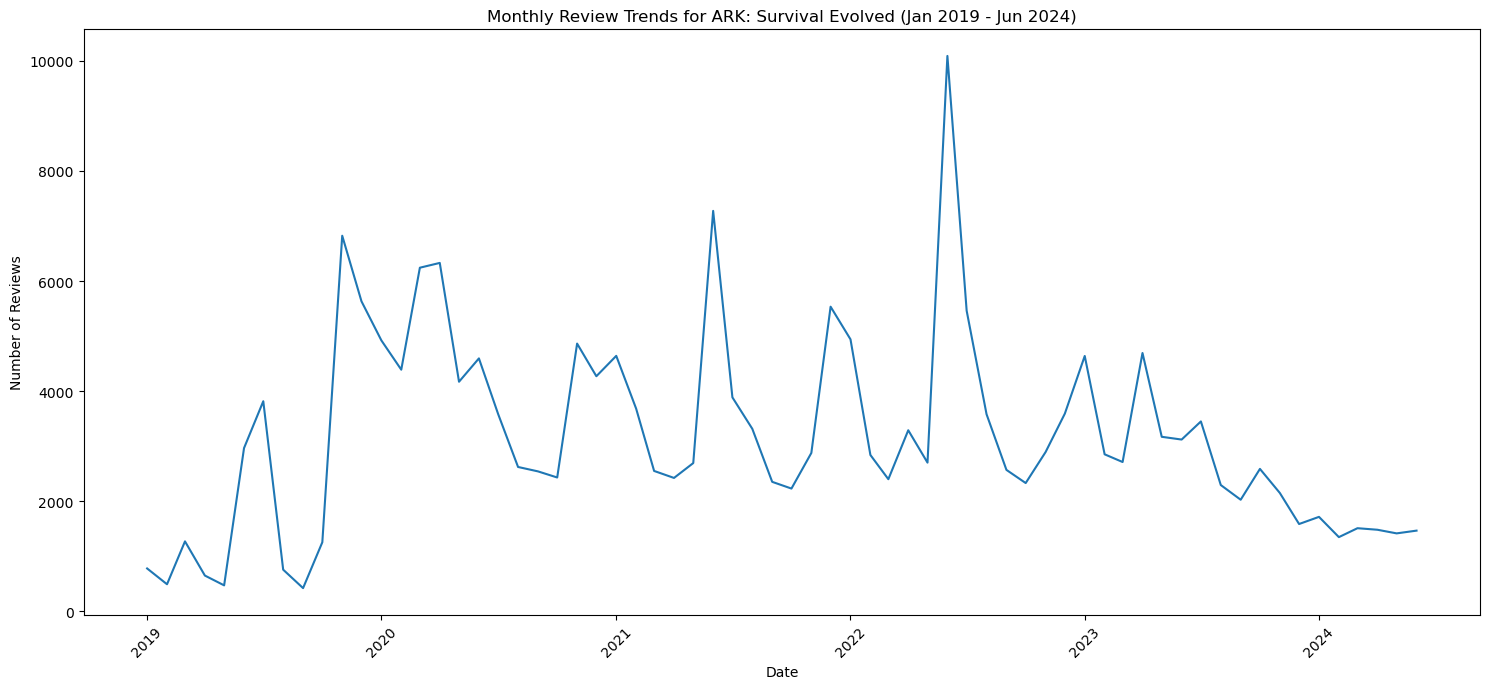

In [13]:
# 1. Monthly Review Trends
section_header("Monthly Review Trends", "monthly-review-trends")

"""
This visualization shows the ebb and flow of review activity over time. 

- Spikes might indicate major updates, sales, or viral moments.
- Troughs could suggest periods of lower player interest or game issues.
- The overall trend can reveal if the game is gaining or losing momentum.

"""

monthly_reviews = df_filtered.groupby(df_filtered['timestamp_created'].dt.to_period("M")).size().reset_index(name='count')
monthly_reviews['timestamp_created'] = monthly_reviews['timestamp_created'].dt.to_timestamp()

plt.figure(figsize=(15, 7))
plt.plot(monthly_reviews['timestamp_created'], monthly_reviews['count'])
plt.title(f"Monthly Review Trends for {GAME_NAME} (Jan 2019 - Jun 2024)")
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<a id='sentiment-analysis-over-time'></a>

## Sentiment Analysis Over Time

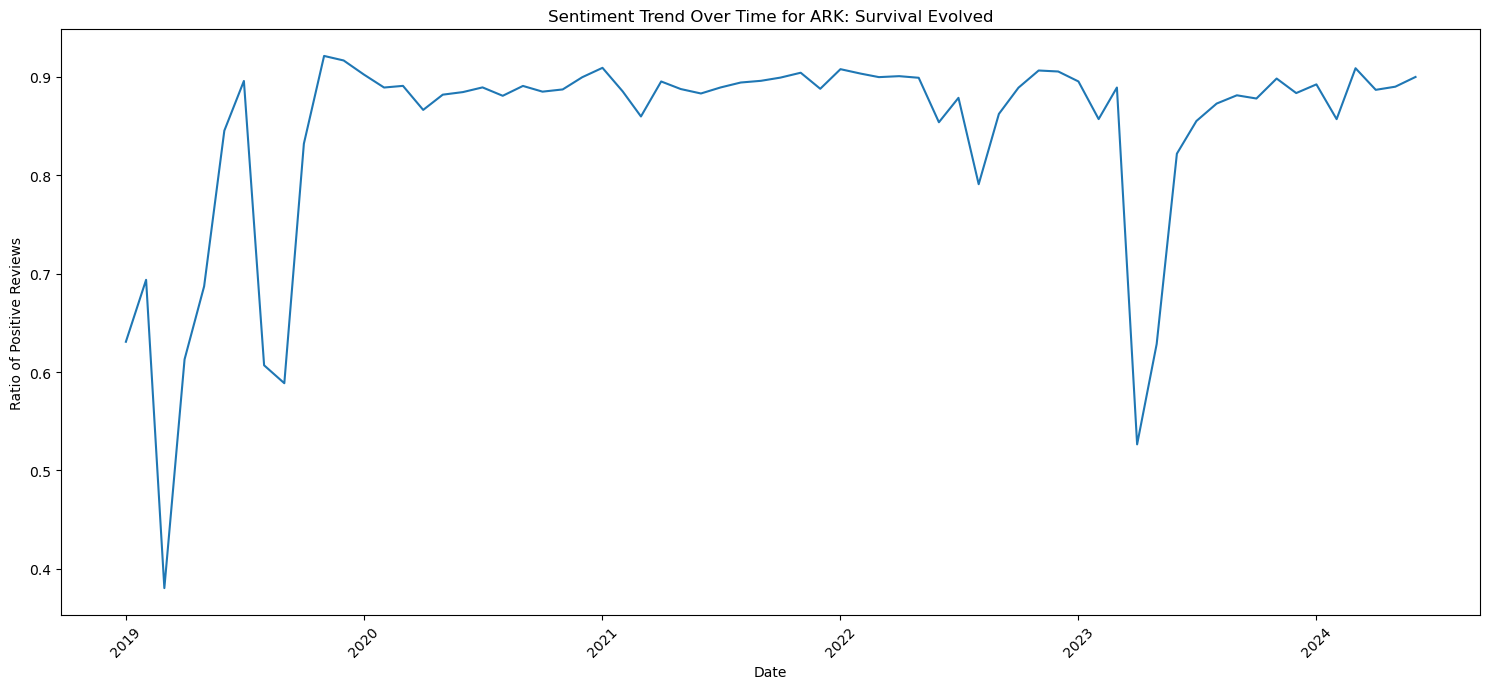

In [14]:
# 2. Sentiment Analysis Over Time
section_header("Sentiment Analysis Over Time", "sentiment-analysis-over-time")

"""
Here we're tracking the game's approval rating over its lifetime.

- Upward trends suggest improvements or positive updates.
- Downward trends might indicate issues or unpopular changes.
- Stability could mean consistent quality or stagnation.

"""

df_filtered = df_filtered.copy()  # Create an explicit copy
df_filtered.loc[:, 'month'] = df_filtered['timestamp_created'].dt.to_period('M')
sentiment_over_time = df_filtered.groupby('month').agg({'voted_up': 'mean'}).reset_index()
sentiment_over_time['month'] = sentiment_over_time['month'].dt.to_timestamp()

plt.figure(figsize=(15, 7))
plt.plot(sentiment_over_time['month'], sentiment_over_time['voted_up'])
plt.title(f"Sentiment Trend Over Time for {GAME_NAME}")
plt.xlabel('Date')
plt.ylabel('Ratio of Positive Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<a id='playtime-vs-review-sentiment'></a>

## Playtime vs Review Sentiment

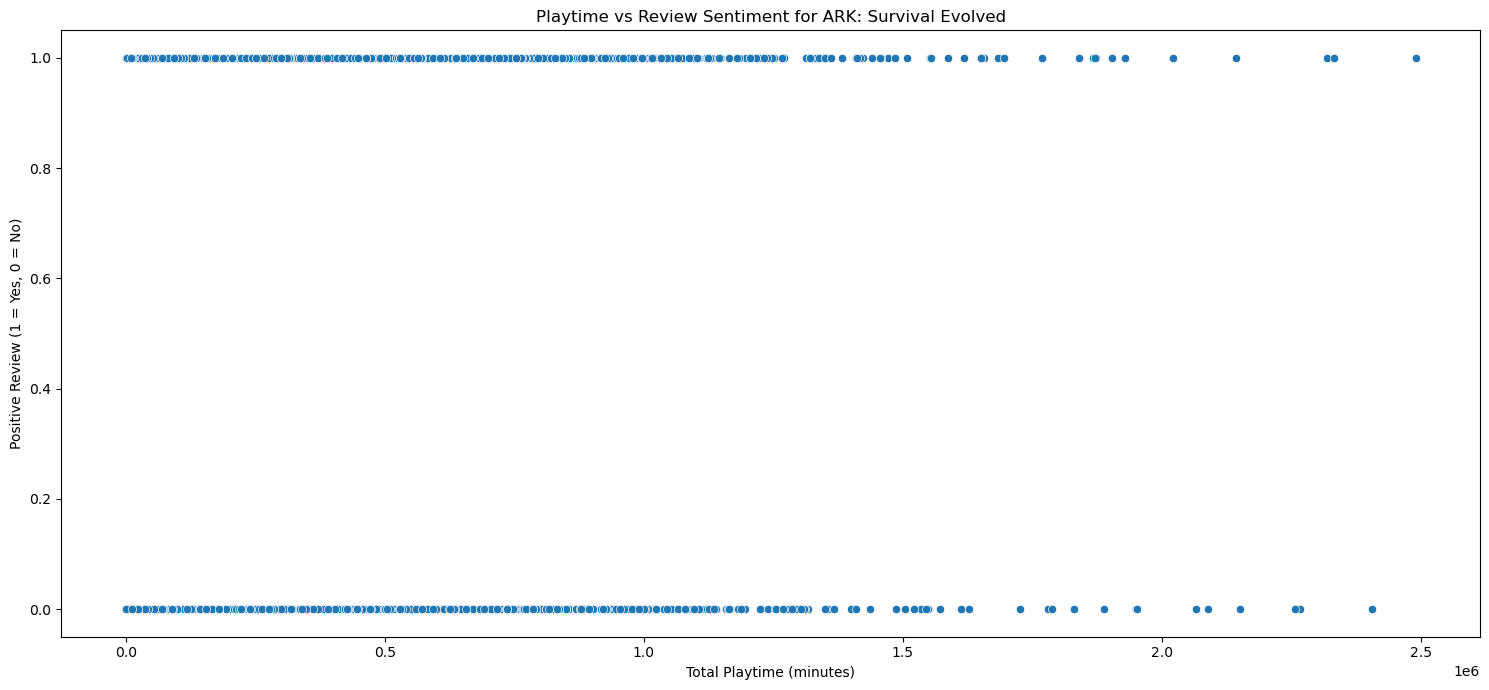

In [15]:
# 3. Playtime vs Review Sentiment
section_header("Playtime vs Review Sentiment", "playtime-vs-review-sentiment")

"""
This shows the relationship between how long people play and how they feel about it.

- Clusters in the top-right are die-hard fans: long playtime and positive reviews.
- Bottom-left clusters might be disappointed players or those who couldn't get into the game.
- Outliers tell interesting stories: loved it but barely played, or played forever but didn't like it?

"""

plt.figure(figsize=(15, 7))
sns.scatterplot(data=df_filtered, x='author_playtime_forever', y='voted_up')
plt.title(f"Playtime vs Review Sentiment for {GAME_NAME}")
plt.xlabel('Total Playtime (minutes)')
plt.ylabel('Positive Review (1 = Yes, 0 = No)')
plt.tight_layout()
plt.show()

<a id='review-length-analysis'></a>

## Review Length Analysis

Review Length Statistics:
count    209859.000000
mean        118.593365
std         342.175274
min           1.000000
25%           9.000000
50%          28.000000
75%          92.000000
max        8000.000000
Name: review_length, dtype: float64

Unique review lengths:
review_length
1.0        4844
2.0        3963
3.0        9120
4.0       10821
5.0        4508
          ...  
7994.0        3
7997.0        6
7998.0        1
7999.0        4
8000.0       11
Name: count, Length: 2815, dtype: int64

Number of non-positive review lengths: 0


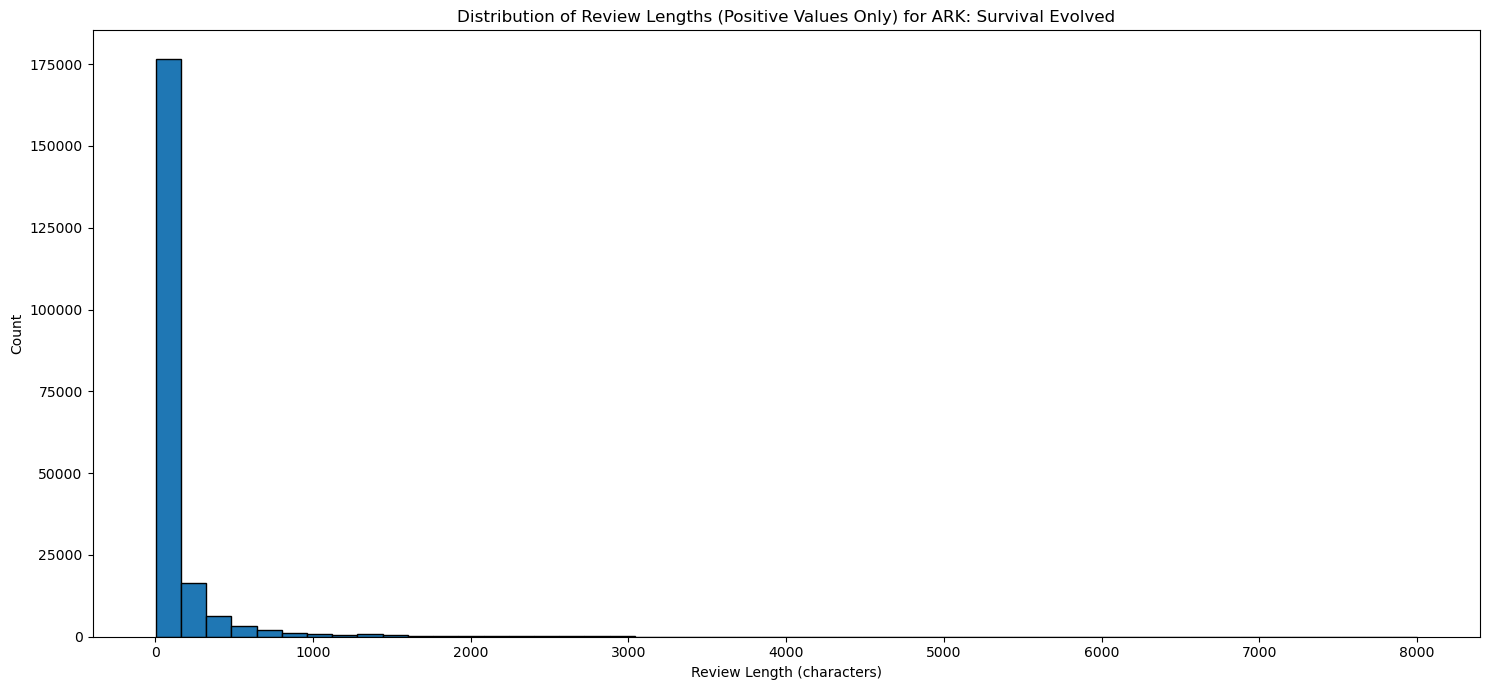

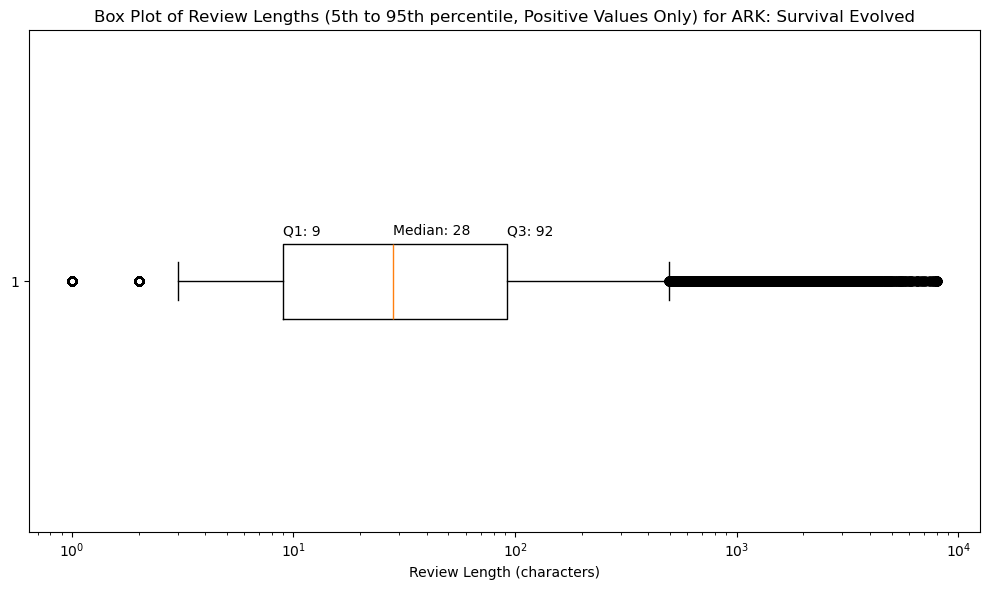


Review Length Percentiles (Positive Values Only):
5th percentile: 3 characters
25th percentile: 9 characters
50th percentile: 28 characters
75th percentile: 92 characters
95th percentile: 495 characters

Correlation between review length and positive sentiment: -0.19


In [16]:
# 4. Review Length Analysis
section_header("Review Length Analysis", "review-length-analysis")


"""
This histogram shows how verbose (or concise) the reviewers tend to be.

- A peak at lower lengths might indicate quick, emotional responses.
- Longer reviews could suggest more thoughtful, detailed feedback.
- The shape of the distribution can tell you about the reviewers' habits.

"""

df_filtered.loc[:, 'review_length'] = df_filtered['review'].str.len()

# Data validation
print("Review Length Statistics:")
print(df_filtered['review_length'].describe())

print("\nUnique review lengths:")
print(df_filtered['review_length'].value_counts().sort_index())

# Check for non-positive values
non_positive = df_filtered[df_filtered['review_length'] <= 0]
print(f"\nNumber of non-positive review lengths: {len(non_positive)}")

if len(non_positive) > 0:
    print("Sample of reviews with non-positive lengths:")
    print(non_positive[['review', 'review_length']].head())

# Proceed with visualization only if we have positive values
positive_lengths = df_filtered[df_filtered['review_length'] > 0]['review_length']

if len(positive_lengths) > 0:
    # Histogram
    plt.figure(figsize=(15, 7))
    plt.hist(positive_lengths, bins=50, edgecolor='black')
    plt.title(f"Distribution of Review Lengths (Positive Values Only) for {GAME_NAME}")
    plt.xlabel('Review Length (characters)')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    # Box Plot
    plt.figure(figsize=(10, 6))
    bp = plt.boxplot(positive_lengths, vert=False, whis=[5, 95])
    plt.title(f"Box Plot of Review Lengths (5th to 95th percentile, Positive Values Only) for {GAME_NAME}")
    plt.xlabel('Review Length (characters)')
    plt.xscale('log')  # Use log scale for x-axis

    # Add labels for quartiles
    quartiles = positive_lengths.quantile([0.25, 0.5, 0.75])
    for i, q in enumerate(['Q1', 'Median', 'Q3']):
        plt.text(quartiles.iloc[i], 1.1, f'{q}: {quartiles.iloc[i]:.0f}', 
                 verticalalignment='center')

    plt.tight_layout()
    plt.show()

    # Print additional percentiles for context
    percentiles = positive_lengths.quantile([0.05, 0.25, 0.5, 0.75, 0.95])
    print("\nReview Length Percentiles (Positive Values Only):")
    for p, v in percentiles.items():
        print(f"{p*100:.0f}th percentile: {v:.0f} characters")

    # Correlation between review length and sentiment
    correlation = positive_lengths.corr(df_filtered.loc[positive_lengths.index, 'voted_up'])
    print(f"\nCorrelation between review length and positive sentiment: {correlation:.2f}")
else:
    print("No positive review lengths found. Cannot create visualizations.")

# If we have non-positive values, let's investigate further
if len(non_positive) > 0:
    print("\nAnalysis of non-positive review lengths:")
    print(non_positive['review_length'].value_counts().sort_index())
    print("\nSample of reviews with non-positive lengths:")
    print(non_positive[['review', 'review_length']].head())

<a id='early-access-impact'></a>

## Early Access Impact

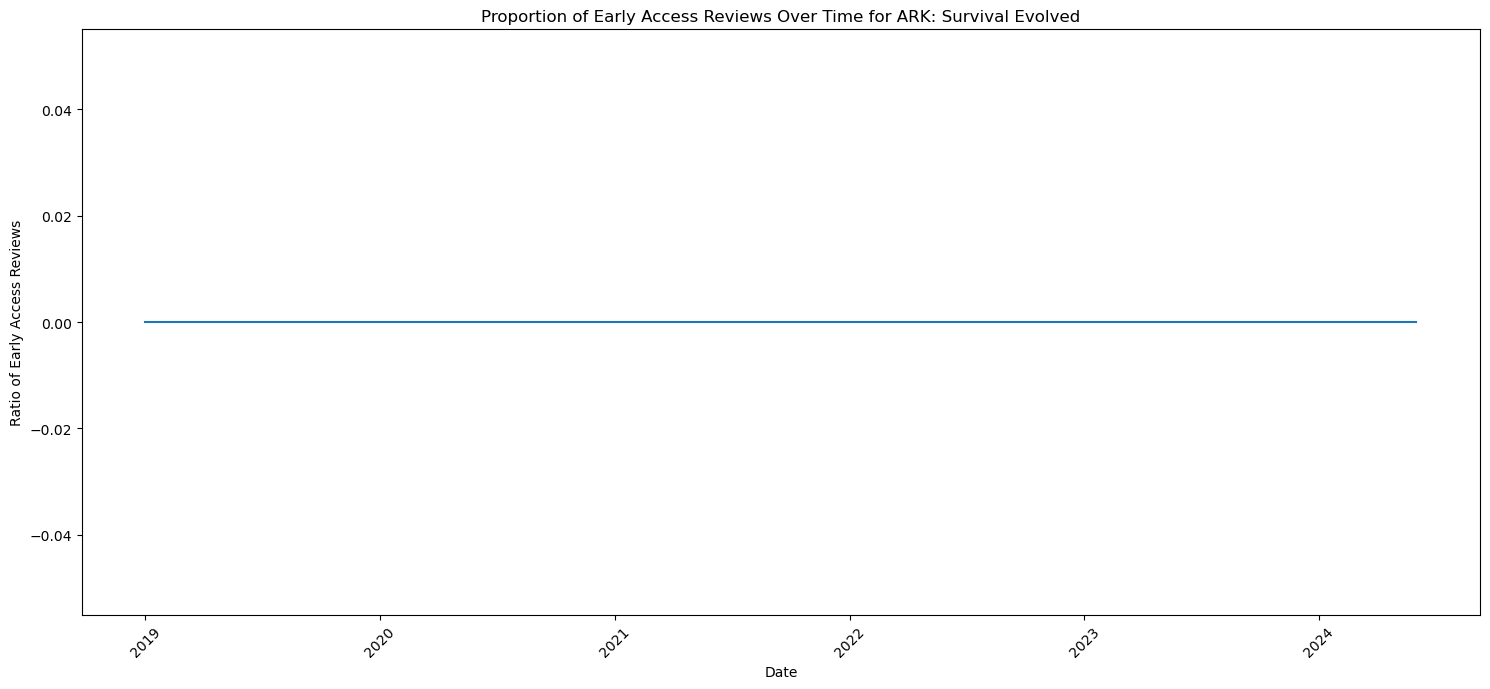

In [17]:
# 5. Early Access Impact
section_header("Early Access Impact", "early-access-impact")


"""
This chart shows how the Early Access phase influenced player opinions over time.

- High early proportions show initial early adopter enthusiasm.
- The trend downwards indicates the transition to full release.
- Post-release blips might suggest nostalgia or comparisons to the early days.

"""

early_access_trend = df_filtered.groupby('month').agg({'written_during_early_access': 'mean'}).reset_index()
early_access_trend['month'] = early_access_trend['month'].dt.to_timestamp()

plt.figure(figsize=(15, 7))
plt.plot(early_access_trend['month'], early_access_trend['written_during_early_access'])
plt.title(f"Proportion of Early Access Reviews Over Time for {GAME_NAME}")
plt.xlabel('Date')
plt.ylabel('Ratio of Early Access Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<a id='language-distribution'></a>

## Language Distribution

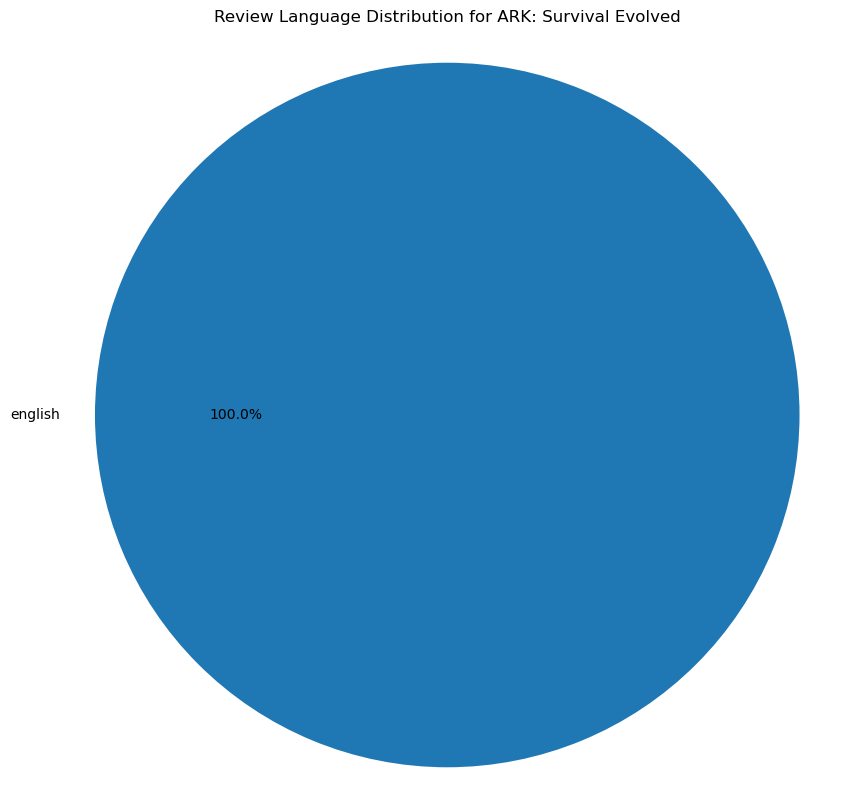

In [18]:
# 6. Language Distribution
section_header("Language Distribution", "language-distribution")


"""
This pie chart shows the global linguistic reach and cultural impact of the game.

- Dominant languages indicate the primary markets.
- Diverse small slices suggest a global cult following.
- Unexpected languages might reveal surprising new markets.

"""

language_dist = df_filtered['language'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(language_dist.values, labels=language_dist.index, autopct='%1.1f%%')
plt.title(f"Review Language Distribution for {GAME_NAME}")
plt.axis('equal')
plt.show()

<a id='player-experience-level'></a>

## Player Experience Level

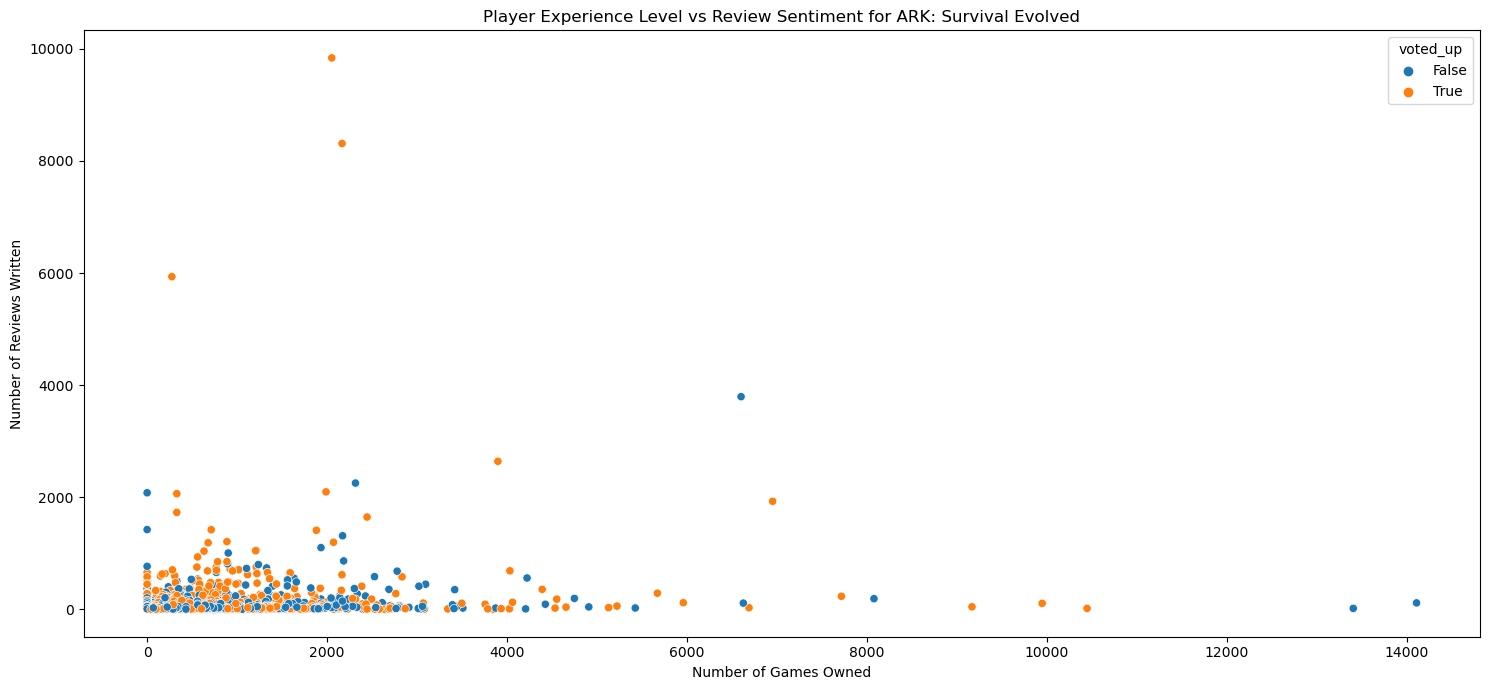

In [19]:
# 7. Player Experience Level
section_header("Player Experience Level", "player-experience-level")


"""
This scatter plot is like a gamer demographic survey for the reviewers. 
It shows how experienced Steam users react to the game.

- Clusters can reveal the core audience: newbies, veterans, or a mix?
- The color distribution shows how different player types rate the game.
- Outliers might be influential reviewers or unique player experiences.

It's a way to see if the game is a hit with the Steam elite or a gateway game for newcomers!

"""

plt.figure(figsize=(15, 7))
sns.scatterplot(data=df_filtered, x='author_num_games_owned', y='author_num_reviews', hue='voted_up')
plt.title(f"Player Experience Level vs Review Sentiment for {GAME_NAME}")
plt.xlabel('Number of Games Owned')
plt.ylabel('Number of Reviews Written')
plt.tight_layout()
plt.show()

<a id='review-helpfulness-over-time'></a>

## Review Helpfulness Over Time

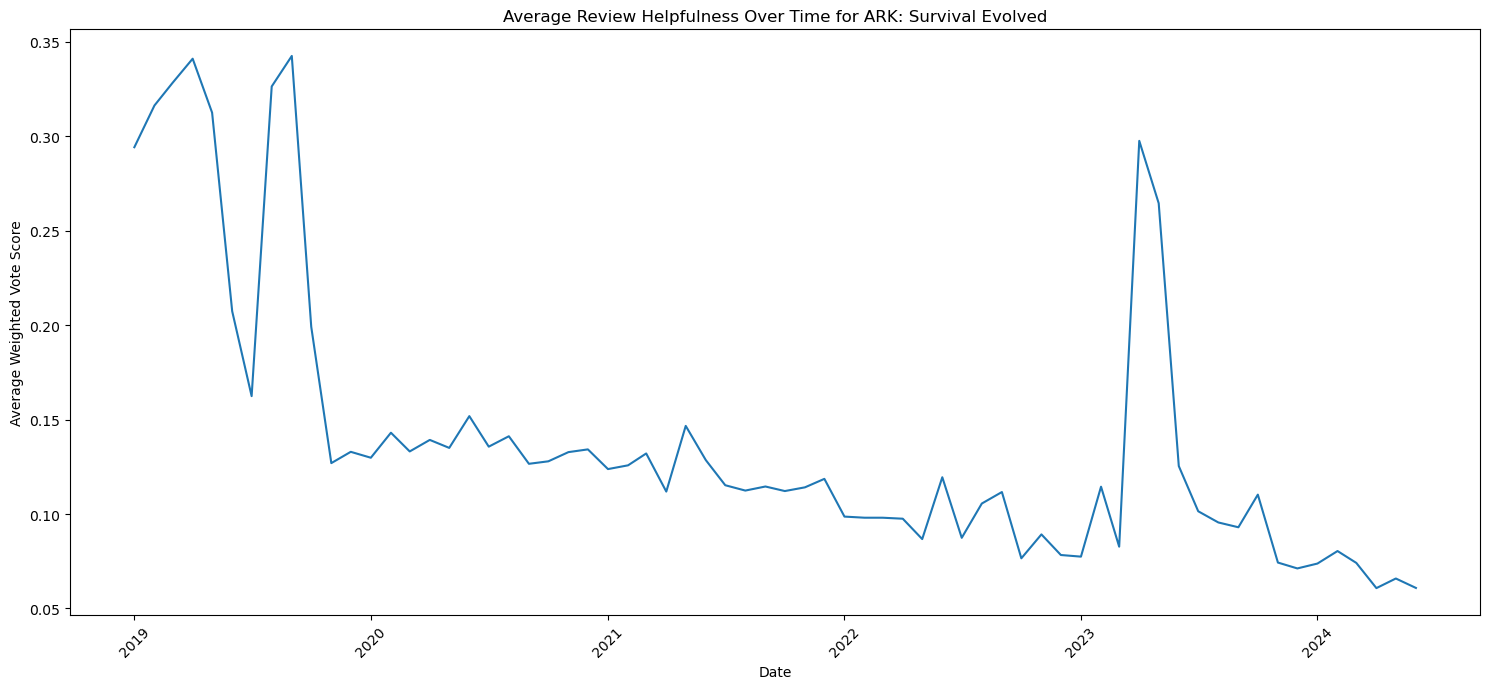

In [20]:
# 8. Review Helpfulness Over Time
section_header("Review Helpfulness Over Time", "review-helpfulness-over-time")


"""
This trend line shows how useful other players find the reviews.

- Upward trends suggest more insightful or balanced reviews over time.
- Downward trends might indicate controversial periods or review bombing.
- Stability could mean consistent community engagement.

"""

helpfulness_over_time = df_filtered.groupby('month').agg({'weighted_vote_score': 'mean'}).reset_index()
helpfulness_over_time['month'] = helpfulness_over_time['month'].dt.to_timestamp()

plt.figure(figsize=(15, 7))
plt.plot(helpfulness_over_time['month'], helpfulness_over_time['weighted_vote_score'])
plt.title(f"Average Review Helpfulness Over Time for {GAME_NAME}")
plt.xlabel('Date')
plt.ylabel('Average Weighted Vote Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<a id='seasonal-trends'></a>

## Seasonal Trends

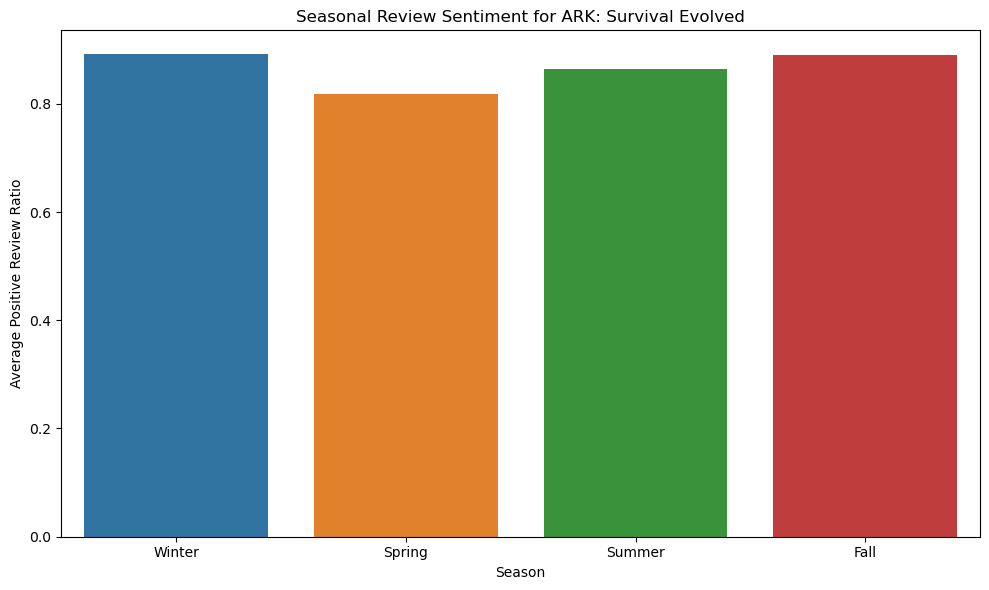

In [21]:
# 9. Seasonal Trends
section_header("Seasonal Trends", "seasonal-trends")


"""
This bar chart shows how the time of year affects player sentiment.

- Higher bars indicate seasons when players tend to enjoy the game more.
- Lower bars might suggest seasonal challenges or competition.
- Patterns could reveal optimal times for updates or promotions.

"""

df_filtered.loc[:, 'season'] = df_filtered['timestamp_created'].dt.month.map({1:'Winter', 2:'Winter', 3:'Spring', 
                                                                              4:'Spring', 5:'Spring', 6:'Summer',
                                                                              7:'Summer', 8:'Summer', 9:'Fall',
                                                                              10:'Fall', 11:'Fall', 12:'Winter'})
seasonal_sentiment = df_filtered.groupby('season')['voted_up'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='voted_up', data=seasonal_sentiment, order=['Winter', 'Spring', 'Summer', 'Fall'])
plt.title(f"Seasonal Review Sentiment for {GAME_NAME}")
plt.xlabel('Season')
plt.ylabel('Average Positive Review Ratio')
plt.tight_layout()
plt.show()

<a id='word-frequency-analysis'></a>

## Word Frequency Analysis

Number of positive reviews: 182424
Number of negative reviews: 28275
Number of words in positive reviews: 3138000
Number of words in negative reviews: 1495173


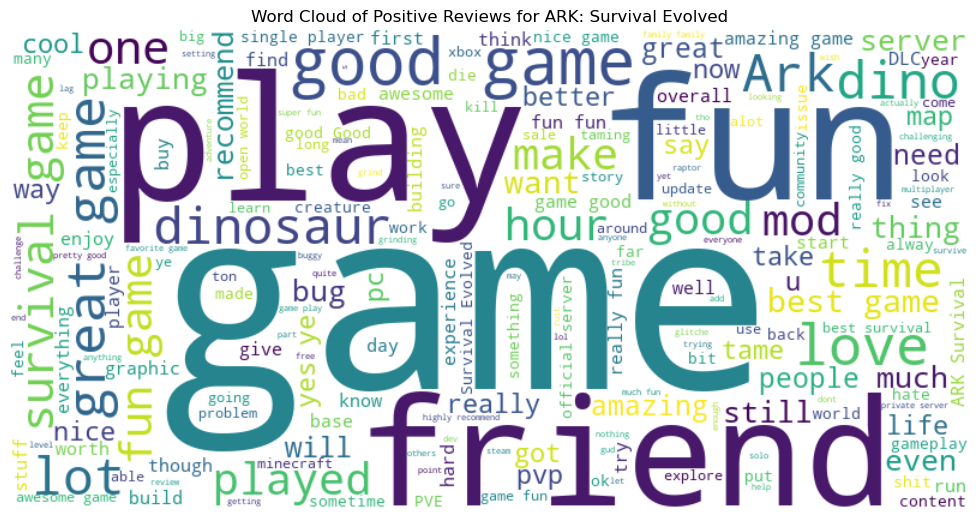

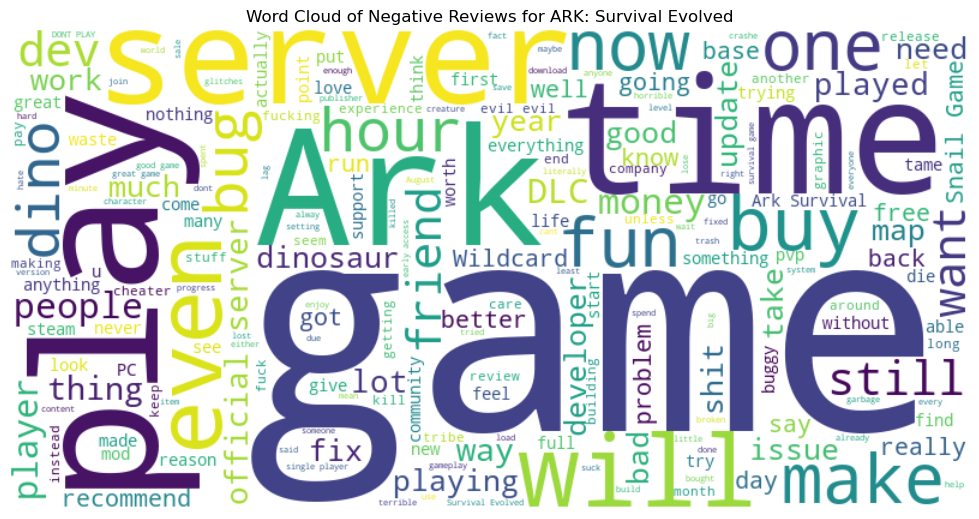


Sample positive review:
this is a great game and I LOVE DINOS

Sample negative review:
On my original account.  I played Stomping lands, B4 Ark.  and was a Beta Player for ark.  and have Probably around 10,000 Hours accumulated  On several accounts.  Some of my Kids, over the years have taken over my Steam accounts,  and I have started a New one,  and RE Purchased Ark, on a few accounts,   Approx, 3 or 4 times in total. I had Originally played Pvp Official servers.  After SO MANY bugs and glitches and EXPLOITS. Of the original game. I went to pve,   ON PVP  many similar Exploits and while NOT Hacks,  but Unfair,  Unbalanced gameplay etc.  reuining PVE servers. Enormous asian, mexican, and BR  Tribes wiping out entire servers.  Pillar/ foundationing entire clusters etc.  it became UNBEARABLE to Play.l   I went on Hardcore official.. Only to become CONSTANTLY bullied ,  and again Unfair, gameplay. Went to private servers for a few years and found some TRUELY Fun,  challenging gameplay. 

In [22]:
# 10. Word Frequency Analysis (Word Cloud)
section_header("Word Frequency Analysis", "word-frequency-analysis")


"""
These word clouds are like thought bubbles floating above the positive and negative reviewers. 
They visually represent the most common terms used in reviews.

- Larger words are more frequently mentioned and potentially more important.
- Positive cloud might reveal beloved features or emotions.
- Negative cloud could highlight pain points or areas for improvement.

"""


def clean_reviews(reviews):
    return ' '.join([str(review) for review in reviews if isinstance(review, str)])

positive_reviews = clean_reviews(df_filtered[df_filtered['voted_up'] == True]['review'])
negative_reviews = clean_reviews(df_filtered[df_filtered['voted_up'] == False]['review'])

def generate_wordcloud(text, title):
    if not text:
        print(f"No valid text for {title}. Skipping word cloud generation.")
        return
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.tight_layout(pad=0)
    plt.show()

# Print some statistics about the reviews
print(f"Number of positive reviews: {len(df_filtered[df_filtered['voted_up'] == True])}")
print(f"Number of negative reviews: {len(df_filtered[df_filtered['voted_up'] == False])}")
print(f"Number of words in positive reviews: {len(positive_reviews.split())}")
print(f"Number of words in negative reviews: {len(negative_reviews.split())}")

generate_wordcloud(positive_reviews, f'Word Cloud of Positive Reviews for {GAME_NAME}')
generate_wordcloud(negative_reviews, f'Word Cloud of Negative Reviews for {GAME_NAME}')

# Optional: Display some sample reviews
print("\nSample positive review:")
print(df_filtered[df_filtered['voted_up'] == True]['review'].iloc[0])

print("\nSample negative review:")
print(df_filtered[df_filtered['voted_up'] == False]['review'].iloc[0])

In [23]:
# Conclusion section
display(Markdown("## Conclusion"))
display(Markdown(f"""
This analysis provides comprehensive insights into the player reception and trends of {GAME_NAME} on Steam. """))

## Conclusion


This analysis provides comprehensive insights into the player reception and trends of ARK: Survival Evolved on Steam. 